# Required Libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,KFold,GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from mpl_toolkits import mplot3d
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import warnings
warnings.filterwarnings("ignore")

# Data Importation

In [3]:
df=pd.read_excel("mars_weather_dataset.xlsx")

In [4]:
df
df2=df

# Data Pre processing

In [5]:
df.shape

(70404, 50)

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(70404, 50)

In [8]:
df.isnull().sum()

sclk                    0
sclk_sub                0
det_num                 0
target_type_num         0
utc                     0
incidence               0
emission                0
phase                   0
bore_flag               0
nfov                    0
scan_period             0
ra                      0
dec                     0
x2d                     0
y2d                     0
npts2d                  0
temp                    0
shift                   0
tsurfco2                0
chi2temp                0
pres0                   0
taudust                 0
tauice                  0
tsurfa                  0
dustuncert              0
iceuncert               0
chi2a                   0
zdust                   0
prum                    0
zh2o                    0
tsurfh2o                0
wateruncert             0
chi2b                   0
ierr                    0
ccsds_id                0
qnvv                    0
qvv                     0
qobsrad                 0
qls         

In [9]:
df=df.replace('0.0',np.nan)

In [ ]:
df=df.drop_duplicates()

In [10]:
df=df.replace('0',np.nan)

In [11]:
df.drop(['incidence','emission','phase','bore_flag','nfov','scan_period','ra','dec','x2d','sclk','sclk_sub','det_num','target_type_num','target_range','qshgt','qlt','qobsrad','qvv','qnvv','ccsds_id','ierr','y2d','npts2d'],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70404 entries, 0 to 70403
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   utc                   70404 non-null  object
 1   temp                  46120 non-null  object
 2   shift                 1 non-null      object
 3   tsurfco2              46120 non-null  object
 4   chi2temp              46120 non-null  object
 5   pres0                 46120 non-null  object
 6   taudust               46120 non-null  object
 7   tauice                46120 non-null  object
 8   tsurfa                46120 non-null  object
 9   dustuncert            46120 non-null  object
 10  iceuncert             46120 non-null  object
 11  chi2a                 46120 non-null  object
 12  zdust                 46120 non-null  object
 13  prum                  9806 non-null   object
 14  zh2o                  9807 non-null   object
 15  tsurfh2o              9806 non-null 

In [13]:
df.isnull().sum()

utc                         0
temp                    24284
shift                   70403
tsurfco2                24284
chi2temp                24284
pres0                   24284
taudust                 24284
tauice                  24284
tsurfa                  24284
dustuncert              24284
iceuncert               24284
chi2a                   24284
zdust                   24284
prum                    60598
zh2o                    60597
tsurfh2o                60598
wateruncert             60597
chi2b                   24285
qls                      5857
latitude                24284
longitude               24284
sc_altitude              5857
temp_quality_flag       66102
taudust_quality_flag    39253
tauice_quality_flag     41059
prum_quality_flag       27299
tsurfa_quality_flag     64830
dtype: int64

In [14]:
df2=df[df.temp.notnull()]

In [15]:
df2.shape

(46120, 27)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46120 entries, 30 to 70380
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   utc                   46120 non-null  object
 1   temp                  46120 non-null  object
 2   shift                 1 non-null      object
 3   tsurfco2              46120 non-null  object
 4   chi2temp              46120 non-null  object
 5   pres0                 46120 non-null  object
 6   taudust               46120 non-null  object
 7   tauice                46120 non-null  object
 8   tsurfa                46120 non-null  object
 9   dustuncert            46120 non-null  object
 10  iceuncert             46120 non-null  object
 11  chi2a                 46120 non-null  object
 12  zdust                 46120 non-null  object
 13  prum                  9806 non-null   object
 14  zh2o                  9807 non-null   object
 15  tsurfh2o              9806 non-null

In [17]:
df2.drop(['temp_quality_flag','taudust_quality_flag','tauice_quality_flag','prum_quality_flag','tsurfa_quality_flag','shift'],axis=1,inplace=True)

In [18]:
df2.head()

,utc,temp,tsurfco2,chi2temp,pres0,taudust,tauice,tsurfa,dustuncert,iceuncert,...,zdust,prum,zh2o,tsurfh2o,wateruncert,chi2b,qls,latitude,longitude,sc_altitude
30,2021-02-20 11:25:34.943,181.61199950937896,186.76805610159147,1.1262144899122448,5.89526316042991,0.08470247285052895,0.12622774932215197,189.40544776416007,0.08374053340543823,0.038598108325237454,...,2.0,NaN,NaN,NaN,NaN,2.920411723798771,6.435855388641357,-19.877602,-4.0797696,36532.59375
31,2021-02-20 11:25:36.944,184.2307435022396,183.90969617708268,1.1706636441078653,5.838251062095404,0.28519526956538443,0.4460522134031472,183.90969617708268,4.243556630202665,0.10364243591736168,...,2.0,NaN,NaN,NaN,NaN,3.433587863442846,6.435866832733154,-13.37622,5.1132994,36531.6484375
32,2021-02-20 11:25:38.944,182.41400910498686,186.39561534933517,0.7407310853899228,6.003143028544503,0.15626514866814856,0.8986743350975428,186.39561534933517,0.13830200074127383,0.14338034392663598,...,2.0,NaN,NaN,NaN,NaN,2.643521071032257,6.435878276824951,-6.549092,8.923509,36530.69921875
33,2021-02-20 11:25:40.945,183.5094839613519,178.55425669428237,0.6829668007204815,6.1571672744933235,0.2838313263443868,0.13537402181847563,172.337547115112,0.059701223613382225,0.04385777393740155,...,2.0,NaN,NaN,NaN,NaN,2.7761663427039025,6.435889720916748,0.5077533,10.1507635,36529.75390625
34,2021-02-20 11:25:42.945,185.5576079312807,175.56852698576233,1.48397804815098,6.324225255240644,0.050207636782627116,0.001,175.56852698576233,0.021603519562396773,0.2,...,2.0,NaN,NaN,NaN,NaN,3.0686604351307443,6.435900688171387,7.9587016,9.053233,36528.8046875


In [19]:
df2.drop(['zdust','prum','zh2o'],axis=1,inplace=True)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46120 entries, 30 to 70380
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   utc          46120 non-null  object
 1   temp         46120 non-null  object
 2   tsurfco2     46120 non-null  object
 3   chi2temp     46120 non-null  object
 4   pres0        46120 non-null  object
 5   taudust      46120 non-null  object
 6   tauice       46120 non-null  object
 7   tsurfa       46120 non-null  object
 8   dustuncert   46120 non-null  object
 9   iceuncert    46120 non-null  object
 10  chi2a        46120 non-null  object
 11  tsurfh2o     9806 non-null   object
 12  wateruncert  9807 non-null   object
 13  chi2b        46119 non-null  object
 14  qls          46120 non-null  object
 15  latitude     46120 non-null  object
 16  longitude    46120 non-null  object
 17  sc_altitude  46120 non-null  object
dtypes: object(18)
memory usage: 6.7+ MB


In [21]:
df=df2

In [22]:
df.wateruncert.unique()

array([nan, 'wateruncert', '3.475860314397196', ..., '3.0795083490538318',
       '1.5391460885744745', '26.400968764726198'], dtype=object)

In [23]:
df2=df[df['wateruncert']=='wateruncert']

In [24]:
df.drop(df2.index,inplace=True)

In [25]:
df.shape

(46119, 18)

In [26]:
cols=list(df.columns)
cols=cols[1:]
convert_types=dict()
for x in cols:
    convert_types[x]=float
df=df.astype(convert_types)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46119 entries, 30 to 70380
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   utc          46119 non-null  object 
 1   temp         46119 non-null  float64
 2   tsurfco2     46119 non-null  float64
 3   chi2temp     46119 non-null  float64
 4   pres0        46119 non-null  float64
 5   taudust      46119 non-null  float64
 6   tauice       46119 non-null  float64
 7   tsurfa       46119 non-null  float64
 8   dustuncert   46119 non-null  float64
 9   iceuncert    46119 non-null  float64
 10  chi2a        46119 non-null  float64
 11  tsurfh2o     9805 non-null   float64
 12  wateruncert  9806 non-null   float64
 13  chi2b        46118 non-null  float64
 14  qls          46119 non-null  float64
 15  latitude     46119 non-null  float64
 16  longitude    46119 non-null  float64
 17  sc_altitude  46119 non-null  float64
dtypes: float64(17), object(1)
memory usage: 6.7+ 

In [28]:
df.head()

,utc,temp,tsurfco2,chi2temp,pres0,taudust,tauice,tsurfa,dustuncert,iceuncert,chi2a,tsurfh2o,wateruncert,chi2b,qls,latitude,longitude,sc_altitude
30,2021-02-20 11:25:34.943,181.612000,186.768056,1.126214,5.895263,0.084702,0.126228,189.405448,0.083741,0.038598,0.907309,NaN,NaN,2.920412,6.435855,-19.877602,-4.079770,36532.593750
31,2021-02-20 11:25:36.944,184.230744,183.909696,1.170664,5.838251,0.285195,0.446052,183.909696,4.243557,0.103642,1.692495,NaN,NaN,3.433588,6.435867,-13.376220,5.113299,36531.648438
32,2021-02-20 11:25:38.944,182.414009,186.395615,0.740731,6.003143,0.156265,0.898674,186.395615,0.138302,0.143380,1.963186,NaN,NaN,2.643521,6.435878,-6.549092,8.923509,36530.699219
33,2021-02-20 11:25:40.945,183.509484,178.554257,0.682967,6.157167,0.283831,0.135374,172.337547,0.059701,0.043858,0.622626,NaN,NaN,2.776166,6.435890,0.507753,10.150764,36529.753906
34,2021-02-20 11:25:42.945,185.557608,175.568527,1.483978,6.324225,0.050208,0.001000,175.568527,0.021604,0.200000,2.345372,NaN,NaN,3.068660,6.435901,7.958702,9.053233,36528.804688


In [29]:
df=df.dropna()
df

,utc,temp,tsurfco2,chi2temp,pres0,taudust,tauice,tsurfa,dustuncert,iceuncert,chi2a,tsurfh2o,wateruncert,chi2b,qls,latitude,longitude,sc_altitude
378,2021-02-21 20:22:33.915,172.053439,161.601584,1.142654,3.000830,0.001000,0.055717,161.601584,0.200000,0.040852,1.135956,157.514963,3.475860,1.496049,7.107137,-13.286766,-123.790730,37667.375000
379,2021-02-21 20:22:37.915,172.902575,156.215307,1.414992,3.518465,0.001000,0.050448,156.215307,0.200000,0.032851,1.689906,151.338242,1.536010,1.569417,7.107159,0.916241,-117.235245,37665.695312
380,2021-02-21 20:22:39.916,175.187921,158.301850,1.369749,4.410104,0.001000,0.001087,158.301850,0.200000,0.020896,2.359451,155.374051,999.000000,1.108137,7.107171,8.800114,-119.124954,37664.851562
390,2021-02-21 20:23:03.921,172.630727,174.506033,1.109249,4.350321,0.001000,0.001000,174.506033,0.200000,0.200000,2.647857,172.611374,999.000000,0.921432,7.107306,-29.329382,-121.695680,37654.750000
391,2021-02-21 20:23:05.921,173.409802,177.929147,0.752755,3.673608,0.070232,1.323487,177.929147,0.087338,0.273584,1.529885,174.177879,999.000000,0.881877,7.107317,-22.286608,-111.590454,37653.906250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38576,2021-08-14 11:37:38.678,177.795028,239.578909,1.101027,8.000694,0.074848,0.038734,251.800423,0.003303,0.001518,1.520983,243.059516,3.136159,2.438271,85.371254,45.786785,17.127810,20264.816406
38577,2021-08-14 11:37:40.678,177.910400,238.043477,1.009919,7.478611,0.070834,0.036866,249.539239,0.003426,0.001574,1.444024,243.440590,2.828425,1.652538,85.371269,41.028996,15.035383,20265.087891
38578,2021-08-14 11:37:42.679,177.337209,238.632464,0.953247,7.178907,0.066215,0.035931,249.410448,0.003316,0.001544,1.412137,244.014638,3.079508,2.358357,85.371277,37.039413,11.599371,20265.359375
38579,2021-08-14 11:37:44.679,174.251641,226.076363,1.062005,7.145120,0.079407,0.055758,240.922240,0.004392,0.002051,1.310564,227.682873,1.539146,1.597130,85.371284,33.626550,6.788052,20265.630859


In [30]:
df['utc']=pd.to_datetime(df['utc'])

In [31]:
date=[]
for x in df.utc:
    x=str(x)
    x=x.split(' ')
    date.append(x[0])
df['date']=date

# Data Exploration

In [32]:
df.head()

,utc,temp,tsurfco2,chi2temp,pres0,taudust,tauice,tsurfa,dustuncert,iceuncert,chi2a,tsurfh2o,wateruncert,chi2b,qls,latitude,longitude,sc_altitude,date
378,2021-02-21 20:22:33.915,172.053439,161.601584,1.142654,3.000830,0.001000,0.055717,161.601584,0.200000,0.040852,1.135956,157.514963,3.47586,1.496049,7.107137,-13.286766,-123.790730,37667.375000,2021-02-21
379,2021-02-21 20:22:37.915,172.902575,156.215307,1.414992,3.518465,0.001000,0.050448,156.215307,0.200000,0.032851,1.689906,151.338242,1.53601,1.569417,7.107159,0.916241,-117.235245,37665.695312,2021-02-21
380,2021-02-21 20:22:39.916,175.187921,158.301850,1.369749,4.410104,0.001000,0.001087,158.301850,0.200000,0.020896,2.359451,155.374051,999.00000,1.108137,7.107171,8.800114,-119.124954,37664.851562,2021-02-21
390,2021-02-21 20:23:03.921,172.630727,174.506033,1.109249,4.350321,0.001000,0.001000,174.506033,0.200000,0.200000,2.647857,172.611374,999.00000,0.921432,7.107306,-29.329382,-121.695680,37654.750000,2021-02-21
391,2021-02-21 20:23:05.921,173.409802,177.929147,0.752755,3.673608,0.070232,1.323487,177.929147,0.087338,0.273584,1.529885,174.177879,999.00000,0.881877,7.107317,-22.286608,-111.590454,37653.906250,2021-02-21


In [33]:
df.shape

(9805, 19)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9805 entries, 378 to 38580
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   utc          9805 non-null   datetime64[ns]
 1   temp         9805 non-null   float64       
 2   tsurfco2     9805 non-null   float64       
 3   chi2temp     9805 non-null   float64       
 4   pres0        9805 non-null   float64       
 5   taudust      9805 non-null   float64       
 6   tauice       9805 non-null   float64       
 7   tsurfa       9805 non-null   float64       
 8   dustuncert   9805 non-null   float64       
 9   iceuncert    9805 non-null   float64       
 10  chi2a        9805 non-null   float64       
 11  tsurfh2o     9805 non-null   float64       
 12  wateruncert  9805 non-null   float64       
 13  chi2b        9805 non-null   float64       
 14  qls          9805 non-null   float64       
 15  latitude     9805 non-null   float64       
 16  lon

In [35]:
df.corr()

,temp,tsurfco2,chi2temp,pres0,taudust,tauice,tsurfa,dustuncert,iceuncert,chi2a,tsurfh2o,wateruncert,chi2b,qls,latitude,longitude,sc_altitude
temp,1.000000,0.294220,-0.166013,0.369204,-0.212467,-0.125914,0.233839,-0.425339,-0.261707,-0.119409,0.265712,-0.244016,-0.175711,-0.145458,0.482799,0.062984,0.084505
tsurfco2,0.294220,1.000000,-0.042510,0.189704,-0.204907,-0.187099,0.966557,-0.305200,-0.256419,-0.046831,0.979083,-0.462844,-0.132927,0.123493,0.405343,0.294872,-0.659136
chi2temp,-0.166013,-0.042510,1.000000,0.028308,0.018534,0.008167,-0.042481,0.029970,0.023820,0.676490,-0.035209,0.003521,0.300867,-0.010345,0.026599,0.026736,0.016154
pres0,0.369204,0.189704,0.028308,1.000000,-0.076969,-0.047511,0.181158,-0.113128,-0.093347,0.011687,0.178668,-0.184576,-0.004732,0.047186,0.437932,0.181833,-0.049022
taudust,-0.212467,-0.204907,0.018534,-0.076969,1.000000,0.473665,-0.155083,0.705540,0.292939,-0.006408,-0.228167,0.210384,0.439474,0.041918,-0.229468,-0.028454,0.064779
tauice,-0.125914,-0.187099,0.008167,-0.047511,0.473665,1.000000,-0.116881,0.374624,0.532916,-0.011636,-0.228590,0.198144,0.446387,0.013824,-0.185187,-0.015112,0.054695
tsurfa,0.233839,0.966557,-0.042481,0.181158,-0.155083,-0.116881,1.000000,-0.292241,-0.221344,-0.048819,0.933443,-0.430280,-0.065984,0.146225,0.380804,0.284428,-0.670298
dustuncert,-0.425339,-0.305200,0.029970,-0.113128,0.705540,0.374624,-0.292241,1.000000,0.409338,-0.010582,-0.289814,0.242680,0.357427,0.063647,-0.359973,-0.030254,0.069653
iceuncert,-0.261707,-0.256419,0.023820,-0.093347,0.292939,0.532916,-0.221344,0.409338,1.000000,-0.009404,-0.238158,0.185837,0.230733,0.001918,-0.222610,-0.046733,0.098567
chi2a,-0.119409,-0.046831,0.676490,0.011687,-0.006408,-0.011636,-0.048819,-0.010582,-0.009404,1.000000,-0.035123,0.005744,0.345132,-0.020785,-0.012033,0.019667,0.047590


In [36]:
df.describe()

,temp,tsurfco2,chi2temp,pres0,taudust,tauice,tsurfa,dustuncert,iceuncert,chi2a,tsurfh2o,wateruncert,chi2b,qls,latitude,longitude,sc_altitude
count,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000
mean,171.423319,197.592660,3.597191,6.307880,0.340351,0.366011,201.426325,0.441187,0.282854,3.130085,195.544692,376.202865,2.547082,63.465423,-3.824223,17.244891,29936.672291
std,7.917728,35.772422,47.219931,1.612710,1.224075,1.185622,38.097461,1.499712,0.974791,35.009992,40.427838,472.170830,4.806270,20.617804,31.627576,102.354095,8356.083718
min,120.000000,135.000000,0.375692,2.060137,0.001000,0.001000,135.000000,0.002044,0.000966,0.429797,140.300000,0.304848,0.342113,7.107137,-87.824620,-179.908330,19926.460938
25%,168.529167,169.316351,0.763139,5.129546,0.027688,0.001000,169.955675,0.017631,0.008490,1.016209,163.244910,3.898511,1.161851,59.449757,-26.298920,-66.088070,20312.341797
50%,171.996805,187.485190,0.984753,5.882305,0.082643,0.071743,192.318229,0.078774,0.083846,1.345969,183.637678,13.521028,1.541823,66.699532,-3.829260,33.590553,30013.837891
75%,175.555916,228.687763,1.553281,7.390595,0.159174,0.205966,234.894505,0.200000,0.200000,2.060502,231.480164,999.000000,2.162323,76.670502,18.662924,102.836260,36953.589844
max,275.340565,320.000000,999.000000,13.699833,9.900000,9.900000,320.000000,9.000000,9.000000,999.000000,320.650000,999.000000,99.000000,85.371300,88.620500,179.972020,42700.550781


<AxesSubplot:>

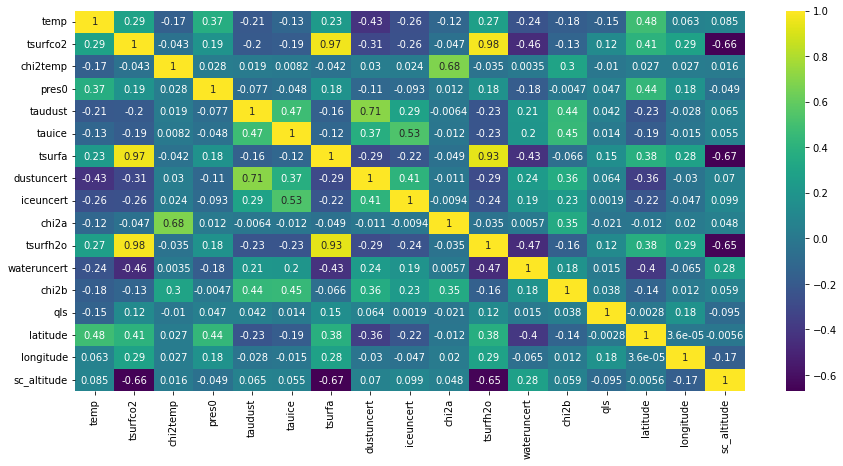

In [37]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [38]:
df=df.reset_index()
df.drop('index',axis=1,inplace=True)

In [39]:
sns.set(style='white')
plt.rcParams['font.family']='cursive'
plt.rcParams['font.size']=30
plt.rc('axes',titlesize=20)
plt.rc('axes',labelsize=20)
plt.rcParams['text.color']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]),
 [Text(0, 0, '2021-07-05T17:21:30.133000000'),
  Text(1, 0, '2021-07-05T17:21:34.133000000'),
  Text(2, 0, '2021-07-05T17:21:38.133000000'),
  Text(3, 0, '2021-07-05T17:21:42.133000000'),
  Text(4, 0, '2021-07-05T17:21:46.133000000'),
  Text(5, 0, '2021-07-05T17:21:50.133000000'),
  Text(6, 0, '2021-07-05T17:21:54.133000000'),
  Text(7, 0, '2021-07-05T17:22:22.133000000'),
  Text(8, 0, '2021-07-05T17:22:26.133000000'),
  Text(9, 0, '2021-07-05T17:22:30.133000000'),
  Text(10, 0, '2021-07-05T17:22:34.133000000'),
  Text(11, 0, '2021-07-05T17:22:38.133000000'),
  Text(12, 0, '2021-07-05T17:22:42.1

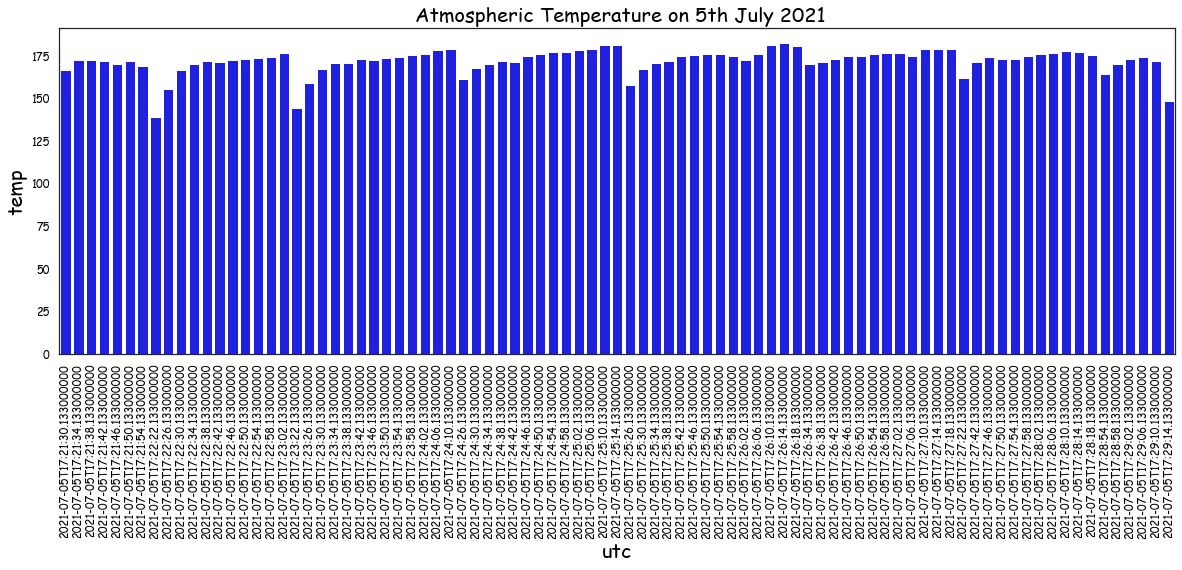

In [40]:
df2=df[df['date']=='2021-07-05']
plt.figure(figsize=(20,6))
sns.barplot(data=df2,x='utc',y='temp',color='blue')
plt.title(' Atmospheric Temperature on 5th July 2021')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85]),
 [Text(0, 0, '2021-06-15T05:02:35.558000000'),
  Text(1, 0, '2021-06-15T05:02:39.558000000'),
  Text(2, 0, '2021-06-15T05:02:43.558000000'),
  Text(3, 0, '2021-06-15T05:02:47.558000000'),
  Text(4, 0, '2021-06-15T05:02:51.558000000'),
  Text(5, 0, '2021-06-15T05:02:55.558000000'),
  Text(6, 0, '2021-06-15T05:03:23.558000000'),
  Text(7, 0, '2021-06-15T05:03:27.558000000'),
  Text(8, 0, '2021-06-15T05:03:31.558000000'),
  Text(9, 0, '2021-06-15T05:03:35.558000000'),
  Text(10, 0, '2021-06-15T05:03:39.558000000'),
  Text(11, 0, '2021-06-15T05:03:43.558000000'),
  Text(12, 0, '2021-06-15T05:03:47.55800

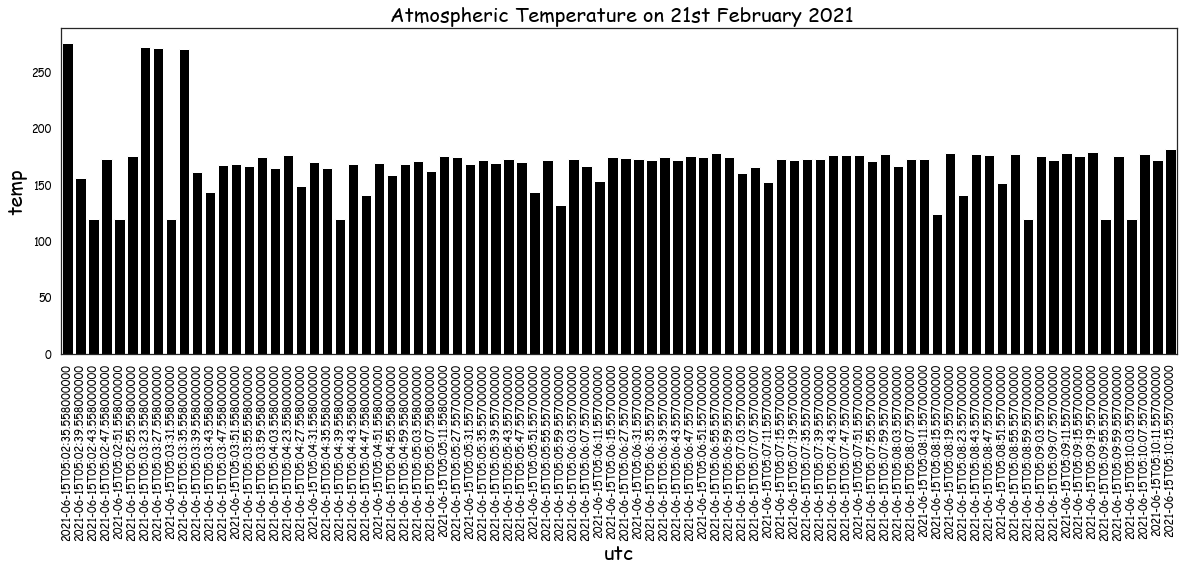

In [41]:
df2=df[df['date']=='2021-06-15']
plt.figure(figsize=(20,6))
sns.barplot(data=df2,x='utc',y='temp',color='black')
plt.title(' Atmospheric Temperature on 21st February 2021')
plt.xticks(rotation=90)

Text(0.5, 1.0, ' Atmospheric Temperature on 21st February 2021')

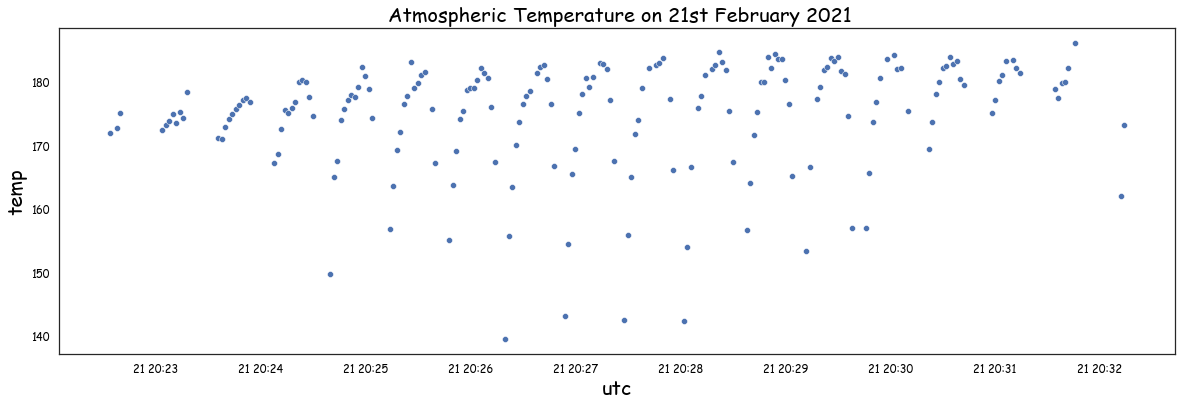

In [42]:
df2=df[df['date']=='2021-02-21']
plt.figure(figsize=(20,6))
sns.scatterplot(data=df2,x='utc',y='temp')
plt.title(' Atmospheric Temperature on 21st February 2021')

Text(0.5, 1.0, ' Atmospheric Temperature on 20th June 2021')

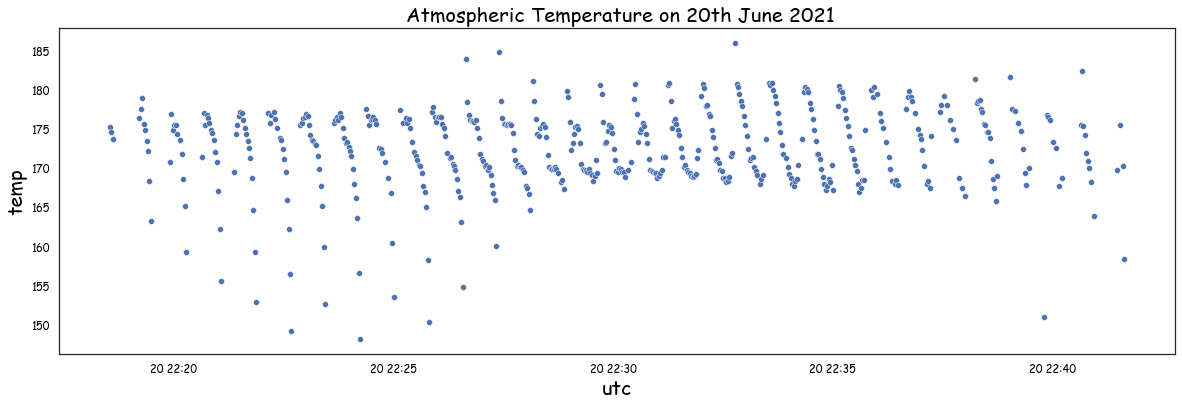

In [43]:
#df.date.value_counts()
df2=df[df['date']=='2021-06-20']
plt.figure(figsize=(20,6))
sns.scatterplot(data=df2,x='utc',y='temp')
plt.title(' Atmospheric Temperature on 20th June 2021')

Text(0.5, 1.0, ' Atmospheric Temperature on 30th June 2021')

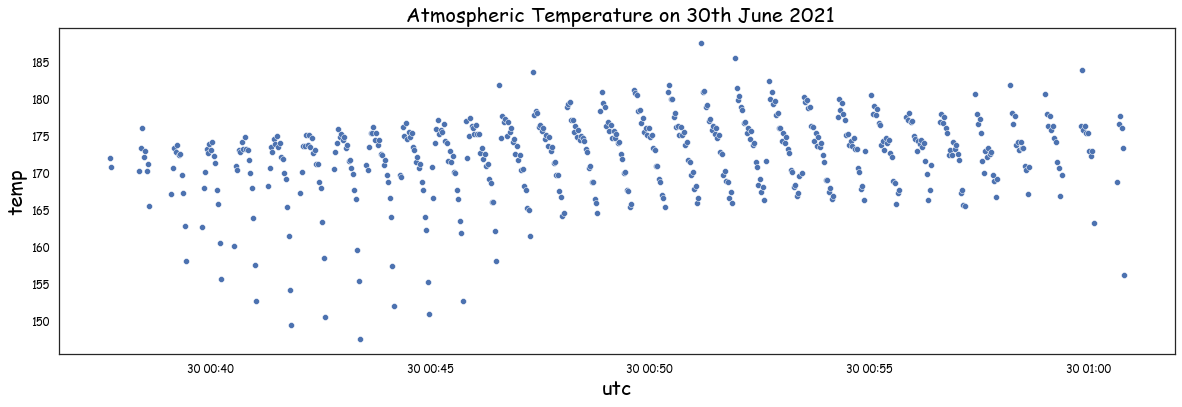

In [44]:
df2=df[df['date']=='2021-06-30']
plt.figure(figsize=(20,6))
sns.scatterplot(data=df2,x='utc',y='temp')
plt.title(' Atmospheric Temperature on 30th June 2021')

Text(0.5, 1.0, ' Atmospheric Temperature on i5th June 2021')

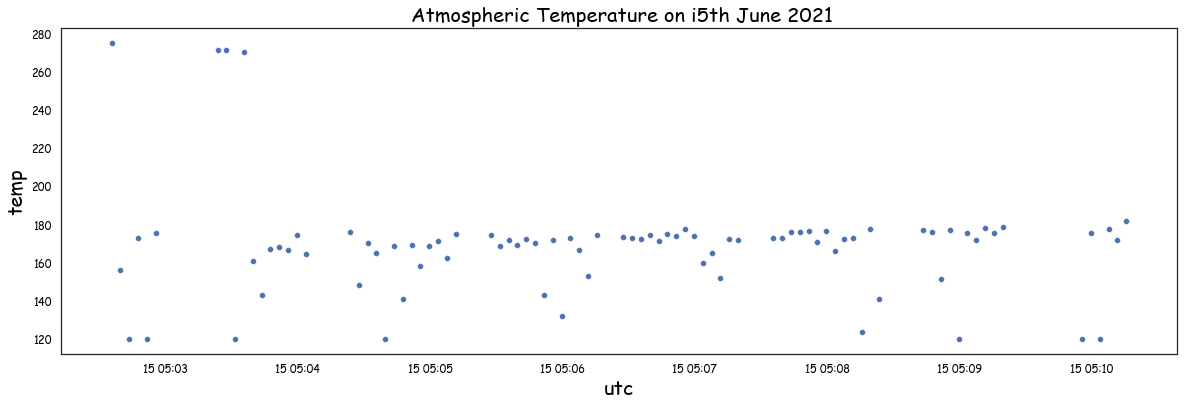

In [45]:
df2=df[df['date']=='2021-06-15']
plt.figure(figsize=(20,6))
sns.scatterplot(data=df2,x='utc',y='temp')
plt.title(' Atmospheric Temperature on i5th June 2021')

Text(0.5, 1.0, ' Atmospheric Temperature on 27th May 2021')

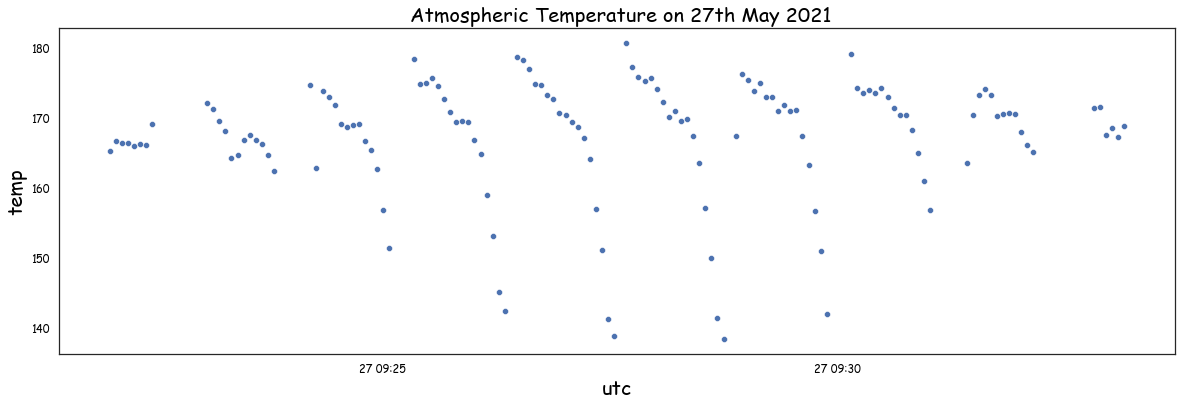

In [46]:
df2=df[df['date']=='2021-05-27']
plt.figure(figsize=(20,6))
sns.scatterplot(data=df2,x='utc',y='temp')
plt.title(' Atmospheric Temperature on 27th May 2021')

Text(0.5, 0, 'mars ST')

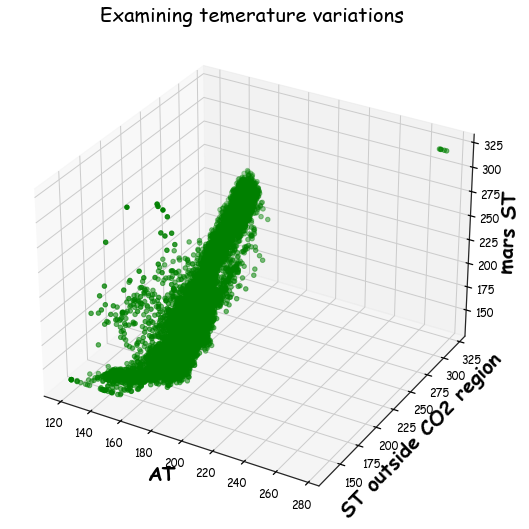

In [47]:
fig = plt.figure(figsize = (16, 9))
plt.rcParams['font.size']=1
ax = plt.axes(projection ="3d")
ax.scatter3D(df['temp'],df['tsurfco2'],df['tsurfa'],color='green')
plt.title("Examining temerature variations")
ax.set_xlabel('AT', fontweight ='bold')
ax.set_ylabel('ST outside CO2 region', fontweight ='bold')
ax.set_zlabel('mars ST', fontweight ='bold')

Text(17.08, 0.5, 'mars ST outside CO2 region')

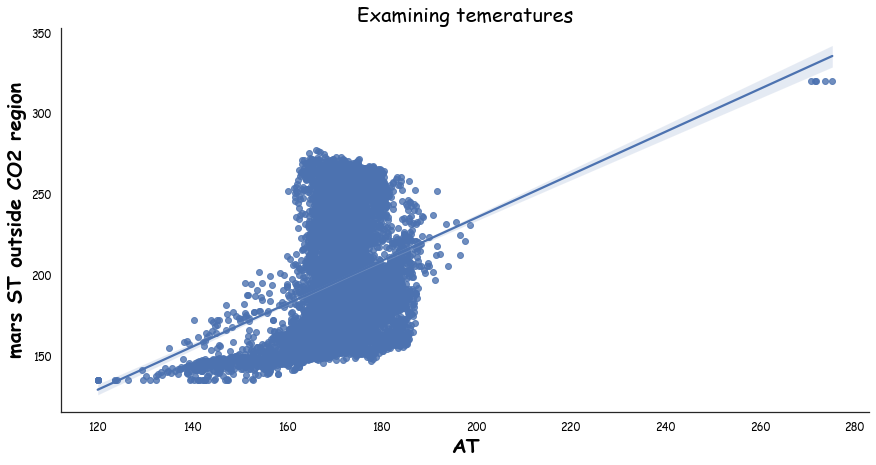

In [48]:
plt.rcParams['font.size']=1
sns.lmplot(data=df,x='temp',y='tsurfco2',aspect=2,height=6)
plt.title("Examining temeratures")
plt.xlabel('AT', fontweight ='bold')
plt.ylabel('mars ST outside CO2 region', fontweight ='bold')

Text(17.08, 0.5, 'mars ST outside water region')

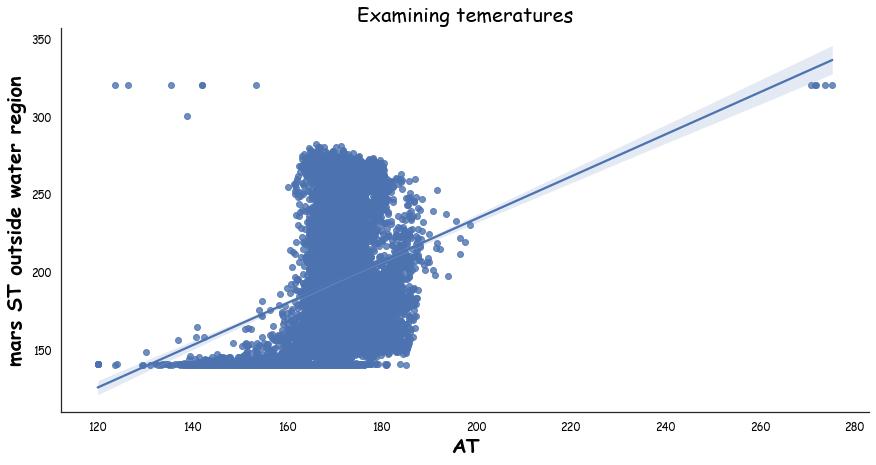

In [49]:
plt.rcParams['font.size']=1
sns.lmplot(data=df,x='temp',y='tsurfh2o',aspect=2,height=6)
plt.title("Examining temeratures")
plt.xlabel('AT', fontweight ='bold')
plt.ylabel('mars ST outside water region', fontweight ='bold')

Text(17.08, 0.5, 'mars ST ')

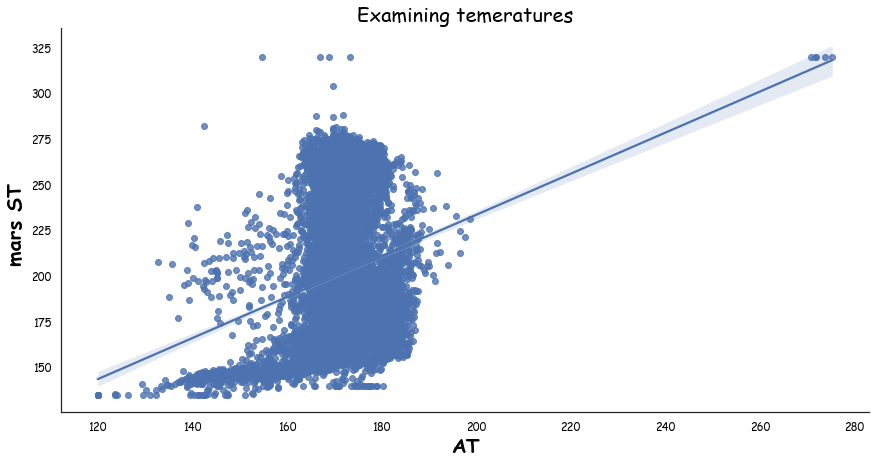

In [50]:
plt.rcParams['font.size']=1
sns.lmplot(data=df,x='temp',y='tsurfa',aspect=2,height=6)
plt.title("Examining temeratures")
plt.xlabel('AT', fontweight ='bold')
plt.ylabel('mars ST ', fontweight ='bold')

Text(0.5, 0.5, 'mars ST outside CO2 region')

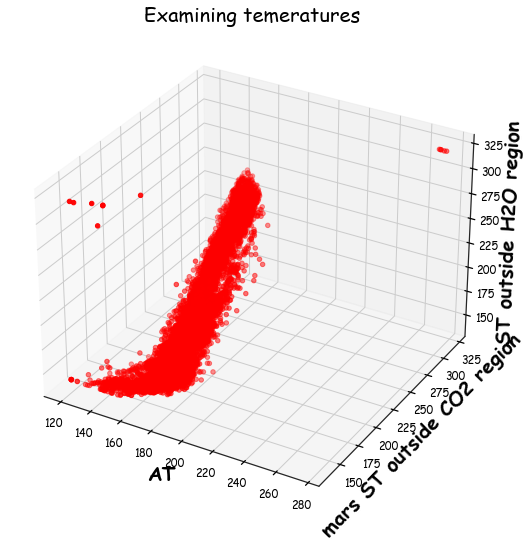

In [51]:
fig = plt.figure(figsize = (16, 9))
plt.rcParams['font.size']=1
ax = plt.axes(projection ="3d")
ax.scatter3D(df['temp'],df['tsurfco2'],df['tsurfh2o'],color='red')
plt.title("Examining temeratures")
ax.set_xlabel('AT', fontweight ='bold')
ax.set_zlabel('ST outside H2O region', fontweight ='bold')
ax.set_ylabel('mars ST outside CO2 region', fontweight ='bold')

Text(0.5, 0.5, 'mars ST outside CO2 region')

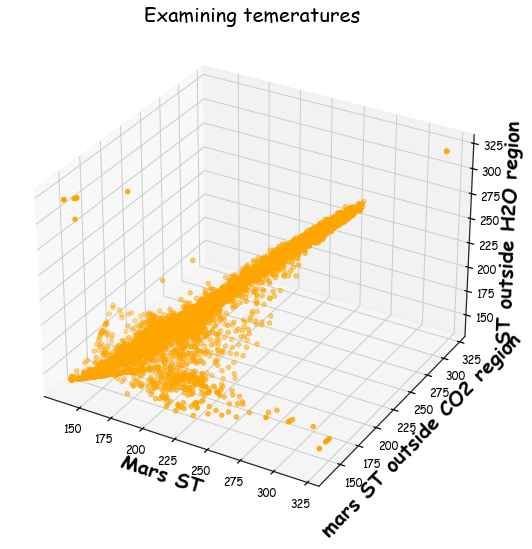

In [52]:
fig = plt.figure(figsize = (16, 9))
plt.rcParams['font.size']=2
ax = plt.axes(projection ="3d")
ax.scatter3D(df['tsurfa'],df['tsurfco2'],df['tsurfh2o'],color='orange')
plt.title("Examining temeratures")
ax.set_xlabel('Mars ST', fontweight ='bold')
ax.set_zlabel('ST outside H2O region', fontweight ='bold')
ax.set_ylabel('mars ST outside CO2 region', fontweight ='bold')

Text(0.5, 0.5, 'mars ST outside H2O region')

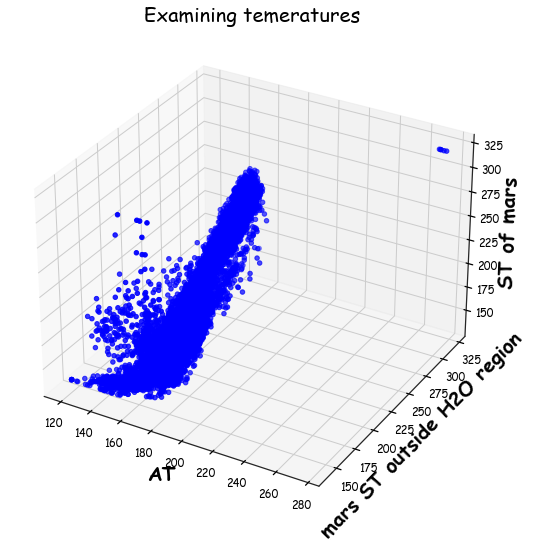

In [53]:
fig = plt.figure(figsize = (16, 9))
plt.rcParams['font.size']=10
ax = plt.axes(projection ="3d")
ax.scatter3D(df['temp'],df['tsurfh2o'],df['tsurfa'],color='blue')
plt.title("Examining temeratures")
ax.set_xlabel('AT', fontweight ='bold')
ax.set_zlabel('ST of mars', fontweight ='bold')
ax.set_ylabel('mars ST outside H2O region', fontweight ='bold')

# Checking for outliers

<AxesSubplot:xlabel='chi2a'>

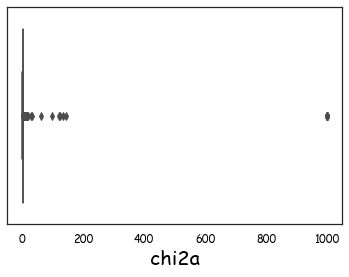

In [54]:
sns.boxplot('chi2a',data=df)

<AxesSubplot:xlabel='temp'>

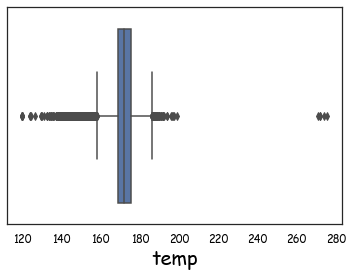

In [55]:
sns.boxplot('temp',data=df)

<AxesSubplot:xlabel='tsurfco2'>

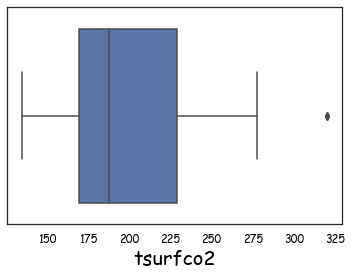

In [56]:
sns.boxplot('tsurfco2',data=df)

<AxesSubplot:xlabel='tsurfh2o'>

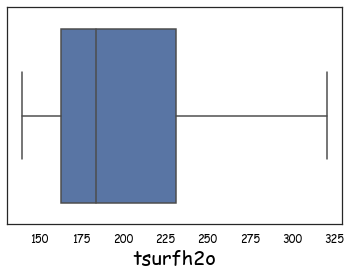

In [57]:
sns.boxplot('tsurfh2o',data=df)

<AxesSubplot:xlabel='pres0'>

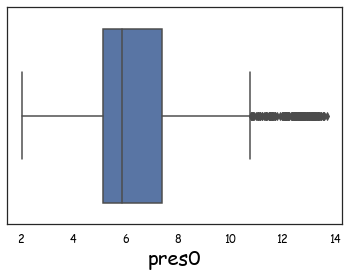

In [58]:
sns.boxplot('pres0',data=df)

# With outliers present within the dataset

In [59]:
x=df2.drop(['temp','longitude','utc','date','sc_altitude'],axis=1).values
y=df2['temp'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [60]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print('Mean Absolute Error(Random Forest Algorithm:)',mean_absolute_error(y_test,rf_pred))
print('Mean Squared Error(Random Forest Algorithm:)',mean_squared_error(y_test,rf_pred))
print('Root Mean squared Error(Random Forest Algorithm:)',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('R squared value(Random Forest Algorithm:)',r2_score(y_test,rf_pred))


Mean Absolute Error(Random Forest Algorithm:) 1.3179233448483598
Mean Squared Error(Random Forest Algorithm:) 4.196720225363468
Root Mean squared Error(Random Forest Algorithm:) 2.0485898138386482
R squared value(Random Forest Algorithm:) 0.9448183253270575


In [61]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print('Mean Absolute Error(Linear regrssion Algorithm:)',mean_absolute_error(y_test,lr_pred))
print('Mean Squared Error(Linear regression Algorithm:)',mean_squared_error(y_test,lr_pred))
print('Root Mean squared Error(Linear regression Algorithm:)',np.sqrt(mean_squared_error(y_test,lr_pred)))
print('R squared value(Linear regression Algorithm:)',r2_score(y_test,lr_pred))

Mean Absolute Error(Linear regrssion Algorithm:) 3.4309794632760977
Mean Squared Error(Linear regression Algorithm:) 50.019086422792164
Root Mean squared Error(Linear regression Algorithm:) 7.072417296992038
R squared value(Linear regression Algorithm:) 0.34231094611953383


In [62]:
svm=SVR()
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
print('Mean Absolute Error(Support vector machine Algorithm:)',mean_absolute_error(y_test,svm_pred))
print('Mean Squared Error(Support vector machine Algorithm:)',mean_squared_error(y_test,svm_pred))
print('Root Mean squared Error(support vector machine Algorithm:)',np.sqrt(mean_squared_error(y_test,svm_pred)))
print('R squared value(support vector machine Algorithm:)',r2_score(y_test,svm_pred))


Mean Absolute Error(Support vector machine Algorithm:) 3.3728954701981033
Mean Squared Error(Support vector machine Algorithm:) 45.12381290121316
Root Mean squared Error(support vector machine Algorithm:) 6.717426062206651
R squared value(support vector machine Algorithm:) 0.4066777317037331


In [63]:
ann=MLPRegressor()
ann.fit(x_train,y_train)
ann_pred=ann.predict(x_test)
print('Mean Absolute Error(Neural Network Algorithm:)',mean_absolute_error(y_test,ann_pred))
print('Mean Squared Error(Artificial Neural network Algorithm:)',mean_squared_error(y_test,ann_pred))
print('Root Mean squared Error(Artificial Neural network Algorithm:)',np.sqrt(mean_squared_error(y_test,ann_pred)))
print('R squared value(Artificial neural network Algorithm:)',r2_score(y_test,ann_pred))


Mean Absolute Error(Neural Network Algorithm:) 149.48794421009333
Mean Squared Error(Artificial Neural network Algorithm:) 22704.66292079703
Root Mean squared Error(Artificial Neural network Algorithm:) 150.68066538477
R squared value(Artificial neural network Algorithm:) -297.5382049730834


In [64]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
print('Mean Absolute Error(Decision Tree Algorithm:)',mean_absolute_error(y_test,dt_pred))
print('Mean Squared Error(Decision Tree Algorithm:)',mean_squared_error(y_test,dt_pred))
print('Root Mean squared Error(Decision Tree Algorithm:)',np.sqrt(mean_squared_error(y_test,dt_pred)))
print('R squared value(Decision Tree Algorithm:)',r2_score(y_test,dt_pred))


Mean Absolute Error(Decision Tree Algorithm:) 1.4242142621641816
Mean Squared Error(Decision Tree Algorithm:) 3.638006323469933
Root Mean squared Error(Decision Tree Algorithm:) 1.9073558460523126
R squared value(Decision Tree Algorithm:) 0.9521647213491723


In [65]:
lasso=Lasso()
lasso.fit(x_train,y_train)
lasso_pred=lasso.predict(x_test)
print('Mean Absolute Error(LASSO Algorithm:)',mean_absolute_error(y_test,lasso_pred))
print('Mean Squared Error(LASSO Algorithm:)',mean_squared_error(y_test,lasso_pred))
print('Root Mean squared Error(LASSO Algorithm:)',np.sqrt(mean_squared_error(y_test,lasso_pred)))
print('R squared value(LASSO Algorithm:)',r2_score(y_test,lasso_pred))


Mean Absolute Error(LASSO Algorithm:) 3.0438396811604314
Mean Squared Error(LASSO Algorithm:) 18.875992007074757
Root Mean squared Error(LASSO Algorithm:) 4.344650964930872
R squared value(LASSO Algorithm:) 0.7518040769626828


In [66]:
cnn= Sequential()
cnn.add(Dense(1, input_shape=(x.shape[1],)))
cnn.compile(optimizer='adam', loss='mean_absolute_error')
cnn.fit(x_train, y_train, epochs=100)
test_loss = cnn.evaluate(x_test, y_test)
print('Test loss:', test_loss)
cnn_pred = cnn.predict(x_test)
print('Mean Absolute Error(Deep Neural Network Algorithm:)',mean_absolute_error(y_test,cnn_pred))
print('Mean Squared Error(Deep Neural Network Algorithm:)',mean_squared_error(y_test,cnn_pred))
print('Root Mean squared Error(Deep Neural Network Algorithm:)',np.sqrt(mean_squared_error(y_test,cnn_pred)))
print('R squared value(Deep Neural Network Algorithm:)',r2_score(y_test,cnn_pred))

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 167.5870
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 167.5827
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 167.5787
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 167.5746
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 167.5704
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 167.5663
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 167.5627
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 167.5584
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 167.5546
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 167.5506
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 167.5465
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 167.5425
Epoch 13/100
4/4 [===================

# Removal of outliers

In [67]:
df=df.drop(['utc','date','sc_altitude'],axis=1)
for x in df.columns:
    ll=df[x].quantile(0.05)
    ul=df[x].quantile(0.95)
    df=df[(df[x]>ll) & (df[x]<ul)]
df

,temp,tsurfco2,chi2temp,pres0,taudust,tauice,tsurfa,dustuncert,iceuncert,chi2a,tsurfh2o,wateruncert,chi2b,qls,latitude,longitude
1969,173.181961,203.959053,1.130275,5.264308,0.132028,0.263397,211.241576,0.066098,0.026650,1.133337,204.402553,69.362288,0.923580,58.640400,-32.317272,-54.706413
1975,179.551950,231.333021,1.013017,8.366886,0.167956,0.021300,236.725851,0.013838,0.004736,1.252246,234.627197,8.846959,2.447804,58.640491,36.454680,-38.594704
1976,179.596473,231.244367,1.183926,8.282880,0.202582,0.139316,240.040805,0.017882,0.007328,1.178034,234.462433,16.231775,1.426785,58.640499,25.584206,-38.728466
1977,176.120255,223.971354,0.875661,8.146422,0.247366,0.148567,230.677074,0.030279,0.010896,1.075459,226.798221,20.384648,0.982278,58.640511,17.458555,-39.562958
1978,176.619119,213.105551,0.868895,7.680759,0.276279,0.320620,222.631449,0.055760,0.018711,1.325267,214.712115,59.960356,1.031755,58.640522,10.599053,-40.701157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514,173.958676,247.303851,1.624857,6.715196,0.094746,0.153648,254.987697,0.012174,0.006373,1.500428,251.864379,5.762347,1.413258,85.367004,3.914921,93.132780
9515,170.872873,252.243122,1.765495,5.043581,0.053746,0.137971,258.331549,0.011815,0.006212,1.342205,256.847146,8.335163,1.761268,85.367027,-2.132178,85.705380
9518,169.796290,251.570464,1.854313,5.408786,0.061513,0.086543,256.539118,0.013133,0.006627,1.276224,255.480869,8.416418,1.710361,85.367065,-13.713339,72.456660
9519,170.209612,240.640785,1.598543,6.083259,0.022149,0.080918,244.183825,0.017054,0.008557,1.016201,244.069640,4.586082,1.836639,85.367088,-19.546747,65.759760


<AxesSubplot:xlabel='chi2a'>

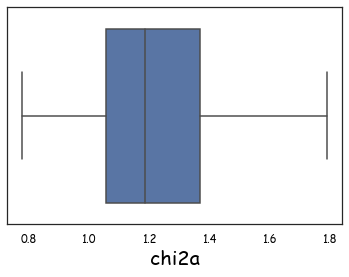

In [68]:
sns.boxplot('chi2a',data=df)

<AxesSubplot:xlabel='temp'>

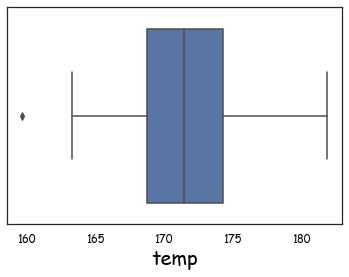

In [69]:
sns.boxplot('temp',data=df)

<AxesSubplot:xlabel='tsurfco2'>

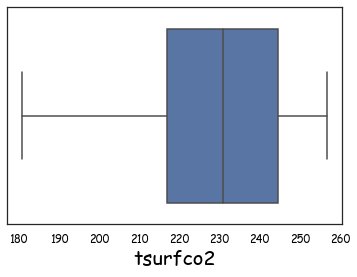

In [70]:
sns.boxplot('tsurfco2',data=df)

<AxesSubplot:xlabel='tsurfh2o'>

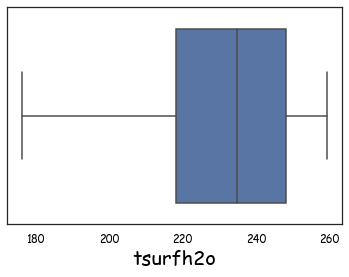

In [71]:
sns.boxplot('tsurfh2o',data=df)

<AxesSubplot:xlabel='pres0'>

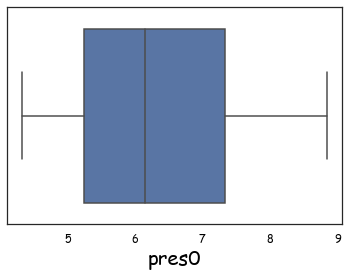

In [72]:
sns.boxplot('pres0',data=df)

# Feature Selection

In [73]:
x=df.drop(['temp','longitude'],axis=1).values
y=df['temp'].values

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [75]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print('Mean Absolute Error(Random Forest Algorithm:)',mean_absolute_error(y_test,rf_pred))
print('Mean Squared Error(Random Forest Algorithm:)',mean_squared_error(y_test,rf_pred))
print('Root Mean squared Error(Random Forest Algorithm:)',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('R squared value(Random Forest Algorithm:)',r2_score(y_test,rf_pred))

Mean Absolute Error(Random Forest Algorithm:) 1.188753911401282
Mean Squared Error(Random Forest Algorithm:) 2.4228435299398896
Root Mean squared Error(Random Forest Algorithm:) 1.5565485954315366
R squared value(Random Forest Algorithm:) 0.827490167290017


In [76]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print('Mean Absolute Error(Linear regrssion Algorithm:)',mean_absolute_error(y_test,lr_pred))
print('Mean Squared Error(Linear regression Algorithm:)',mean_squared_error(y_test,lr_pred))
print('Root Mean squared Error(Linear regression Algorithm:)',np.sqrt(mean_squared_error(y_test,lr_pred)))
print('R squared value(Linear regression Algorithm:)',r2_score(y_test,lr_pred))

Mean Absolute Error(Linear regrssion Algorithm:) 1.5275958675005579
Mean Squared Error(Linear regression Algorithm:) 3.581958265793698
Root Mean squared Error(Linear regression Algorithm:) 1.8926062099110046
R squared value(Linear regression Algorithm:) 0.7449595842363199


In [77]:
svm=SVR()
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
print('Mean Absolute Error(Support vector machine Algorithm:)',mean_absolute_error(y_test,svm_pred))
print('Mean Squared Error(Support vector machine Algorithm:)',mean_squared_error(y_test,svm_pred))
print('Root Mean squared Error(support vector machine Algorithm:)',np.sqrt(mean_squared_error(y_test,svm_pred)))
print('R squared value(support vector machine Algorithm:)',r2_score(y_test,svm_pred))

Mean Absolute Error(Support vector machine Algorithm:) 1.3887219773036368
Mean Squared Error(Support vector machine Algorithm:) 3.98140196452779
Root Mean squared Error(support vector machine Algorithm:) 1.995345074048043
R squared value(support vector machine Algorithm:) 0.7165186367322174


In [78]:
ann=MLPRegressor()
ann.fit(x_train,y_train)
ann_pred=ann.predict(x_test)
print('Mean Absolute Error(Neural Network Algorithm:)',mean_absolute_error(y_test,ann_pred))
print('Mean Squared Error(Artificial Neural network Algorithm:)',mean_squared_error(y_test,ann_pred))
print('Root Mean squared Error(Artificial Neural network Algorithm:)',np.sqrt(mean_squared_error(y_test,ann_pred)))
print('R squared value(Artificial neural network Algorithm:)',r2_score(y_test,ann_pred))

Mean Absolute Error(Neural Network Algorithm:) 31.659981067702947
Mean Squared Error(Artificial Neural network Algorithm:) 1530.9090437442437
Root Mean squared Error(Artificial Neural network Algorithm:) 39.12683278447469
R squared value(Artificial neural network Algorithm:) -108.00285543287711


In [111]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
print('Mean Absolute Error(Decision Tree Algorithm:)',mean_absolute_error(y_test,dt_pred))
print('Mean Squared Error(Decision Tree Algorithm:)',mean_squared_error(y_test,dt_pred))
print('Root Mean squared Error(Decision Tree Algorithm:)',np.sqrt(mean_squared_error(y_test,dt_pred)))
print('R squared value(Decision Tree Algorithm:)',r2_score(y_test,dt_pred))

Mean Absolute Error(Decision Tree Algorithm:) 1.5838708697259685
Mean Squared Error(Decision Tree Algorithm:) 5.103957179648427
Root Mean squared Error(Decision Tree Algorithm:) 2.259193922541495
R squared value(Decision Tree Algorithm:) 0.6365911424573458


In [80]:
lasso=Lasso()
lasso.fit(x_train,y_train)
lasso_pred=lasso.predict(x_test)
print('Mean Absolute Error(LASSO Algorithm:)',mean_absolute_error(y_test,lasso_pred))
print('Mean Squared Error(LASSO Algorithm:)',mean_squared_error(y_test,lasso_pred))
print('Root Mean squared Error(LASSO Algorithm:)',np.sqrt(mean_squared_error(y_test,lasso_pred)))
print('R squared value(LASSO Algorithm:)',r2_score(y_test,lasso_pred))

Mean Absolute Error(LASSO Algorithm:) 2.046925263362781
Mean Squared Error(LASSO Algorithm:) 7.2165658447789545
Root Mean squared Error(LASSO Algorithm:) 2.6863666623860105
R squared value(LASSO Algorithm:) 0.48617046406860587


In [81]:
cnn= Sequential()
cnn.add(Dense(1, input_shape=(x.shape[1],)))
cnn.compile(optimizer='adam', loss='mean_absolute_error')
cnn.fit(x_train, y_train, epochs=100)
test_loss = cnn.evaluate(x_test, y_test)
print('Test loss:', test_loss)
cnn_pred = cnn.predict(x_test)
print('Mean Absolute Error(Deep Neural Network Algorithm:)',mean_absolute_error(y_test,cnn_pred))
print('Mean Squared Error(Deep Neural Network Algorithm:)',mean_squared_error(y_test,cnn_pred))
print('Root Mean squared Error(Deep Neural Network Algorithm:)',np.sqrt(mean_squared_error(y_test,cnn_pred)))
print('R squared value(Deep Neural Network Algorithm:)',r2_score(y_test,cnn_pred))

Epoch 1/100
26/26 [==============================] - 0s 2ms/step - loss: 171.7310
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 171.7039
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 171.6779
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 171.6519
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 171.6265
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 171.6000
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 171.5740
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 171.5480
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 171.5218
Epoch 10/100
26/26 [==============================] - 0s 3ms/step - loss: 171.4960
Epoch 11/100
26/26 [==============================] - 0s 3ms/step - loss: 171.4704
Epoch 12/100
26/26 [==============================] - 0s 2ms/step - loss: 171.4442
Epoch 13/100


In [82]:
rmse_val={'RF':np.sqrt(mean_squared_error(y_test,rf_pred)),'LR':np.sqrt(mean_squared_error(y_test,lr_pred)),'SVM':np.sqrt(mean_squared_error(y_test,svm_pred)),'DT':np.sqrt(mean_squared_error(y_test,dt_pred)),'LASSO':np.sqrt(mean_squared_error(y_test,lasso_pred))}

In [83]:
mae_val={'RF':mean_absolute_error(y_test,rf_pred),'LR':mean_absolute_error(y_test,lr_pred),'SVM':mean_absolute_error(y_test,svm_pred),'DT':mean_absolute_error(y_test,dt_pred),'LASSO':mean_absolute_error(y_test,lasso_pred)}

In [84]:
mse_val={'RF':mean_squared_error(y_test,rf_pred),'LR':mean_squared_error(y_test,lr_pred),'SVM':mean_squared_error(y_test,svm_pred),'DT':mean_squared_error(y_test,dt_pred),'LASSO':mean_squared_error(y_test,lasso_pred)}

In [85]:
r2_val={'RF':r2_score(y_test,rf_pred),'LR':r2_score(y_test,lr_pred),'SVM':r2_score(y_test,svm_pred),'DT':r2_score(y_test,dt_pred),'LASSO':r2_score(y_test,lasso_pred)}

Text(0, 0.5, 'RMSE VALUE')

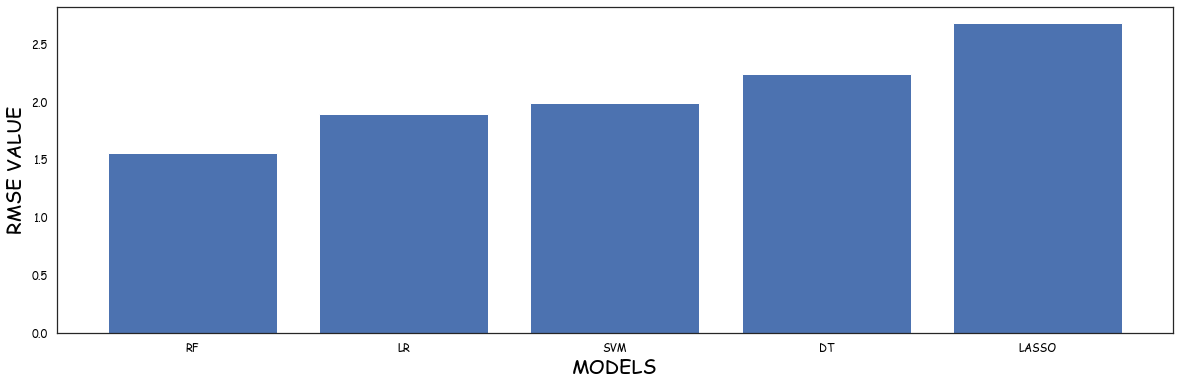

In [86]:
plt.figure(figsize=(20,6))
plt.bar(rmse_val.keys(),rmse_val.values())
plt.xlabel('MODELS')
plt.ylabel('RMSE VALUE')

Text(0, 0.5, 'MSE VALUE')

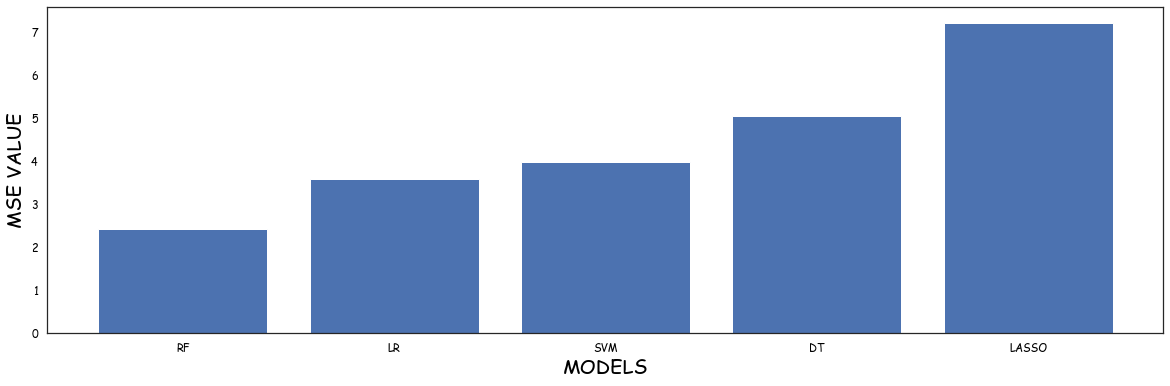

In [87]:
plt.figure(figsize=(20,6))
plt.bar(mse_val.keys(),mse_val.values())
plt.xlabel('MODELS')
plt.ylabel('MSE VALUE')

Text(0, 0.5, 'MAE VALUE')

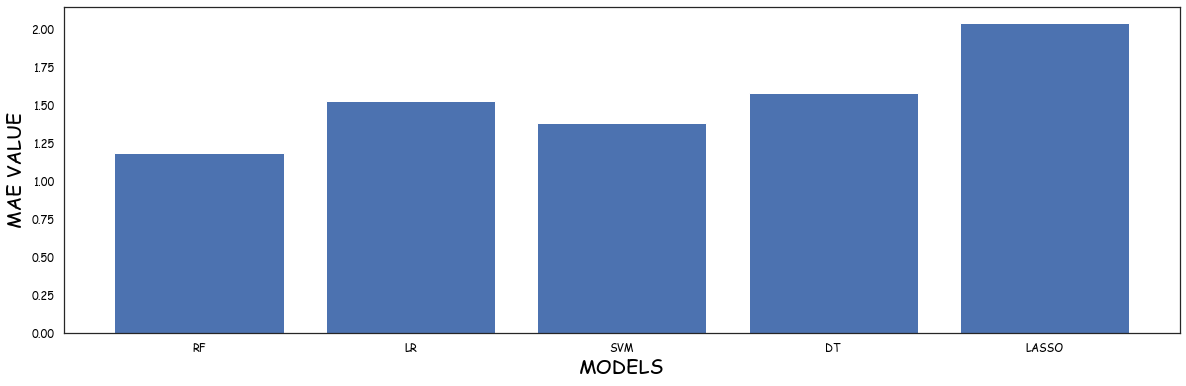

In [88]:
plt.figure(figsize=(20,6))
plt.bar(mae_val.keys(),mae_val.values())
plt.xlabel('MODELS')
plt.ylabel('MAE VALUE')

Text(0, 0.5, 'R2 VALUE')

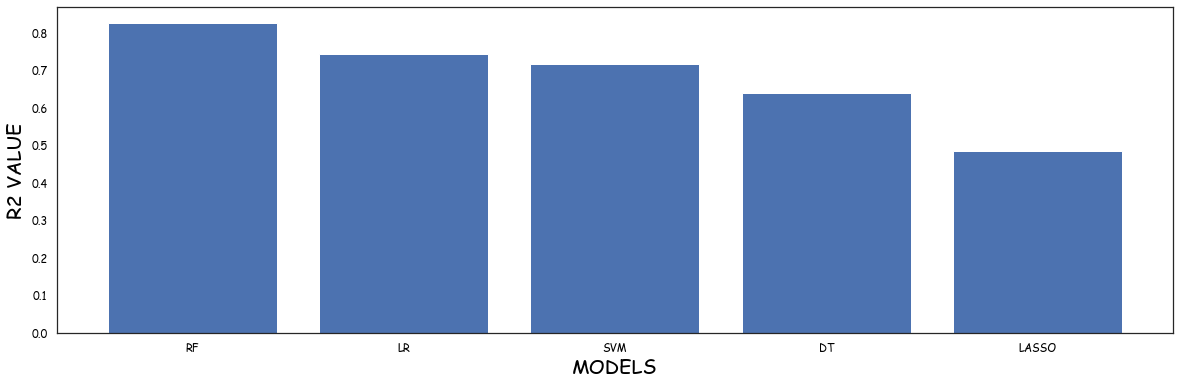

In [89]:
plt.figure(figsize=(20,6))
plt.bar(r2_val.keys(),r2_val.values())
plt.xlabel('MODELS')
plt.ylabel('R2 VALUE')

In [90]:
par_rf= {
    'n_estimators':[150,100,250,300,400],  
}

grid_rf= GridSearchCV(rf, par_rf, n_jobs=-1, cv=10,scoring='accuracy')
grid_rf.fit(x_train,y_train)
best_r= grid_rf.best_params_
print('Best parameters  for RF found:',best_r)

Best parameters  for RF found: {'n_estimators': 150}


In [110]:
rf=grid_rf.best_estimator_
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print('Mean Absolute Error(Random Forest Algorithm:)',mean_absolute_error(y_test,rf_pred))
print('Mean Squared Error(Random Forest Algorithm:)',mean_squared_error(y_test,rf_pred))
print('Root Mean squared Error(Random Forest Algorithm:)',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('R squared value(Random Forest Algorithm:)',r2_score(y_test,rf_pred))

Mean Absolute Error(Random Forest Algorithm:) 1.1939427480952196
Mean Squared Error(Random Forest Algorithm:) 2.4105215913232008
Root Mean squared Error(Random Forest Algorithm:) 1.552585453790934
R squared value(Random Forest Algorithm:) 0.8283675064756311


In [94]:
par_lr= {
    'fit_intercept':[x for x in range(1,20)],
}

grid_lr= GridSearchCV(lr, par_lr, n_jobs=-1, cv=10,scoring='accuracy')
grid_lr.fit(x_train,y_train)
best_lr=grid_lr.best_params_
print('Best parameters  for LR found:', best_lr)

Best parameters  for LR found: {'fit_intercept': 1}


In [95]:
lr=grid_lr.best_estimator_
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print('Mean Absolute Error(Linear regrssion Algorithm:)',mean_absolute_error(y_test,lr_pred))
print('Mean Squared Error(Linear regression Algorithm:)',mean_squared_error(y_test,lr_pred))
print('Root Mean squared Error(Linear regression Algorithm:)',np.sqrt(mean_squared_error(y_test,lr_pred)))
print('R squared value(Linear regression Algorithm:)',r2_score(y_test,lr_pred))

Mean Absolute Error(Linear regrssion Algorithm:) 1.5275958675005579
Mean Squared Error(Linear regression Algorithm:) 3.581958265793698
Root Mean squared Error(Linear regression Algorithm:) 1.8926062099110046
R squared value(Linear regression Algorithm:) 0.7449595842363199


In [96]:
par_svm= {
    'kernel':['linear','polynomial','radial'],
}

grid_svm= GridSearchCV(svm, par_svm, n_jobs=-1, cv=10,scoring='accuracy')
grid_svm.fit(x_train,y_train)
best_svm=grid_svm.best_params_
print('Best parameters  for SVM found:', best_svm)



Best parameters  for SVM found: {'kernel': 'linear'}


In [97]:
par_svm= {
    'kernel':['linear','polynomial','radial'],
}

grid_svm= GridSearchCV(svm, par_svm, n_jobs=-1, cv=10,scoring='accuracy')
grid_svm.fit(x_train,y_train)
best_svm=grid_svm.best_params_
print('Best parameters  for SVM found:', best_svm)


svm=grid_svm.best_estimator_
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
print('Mean Absolute Error(Support vector machine Algorithm:)',mean_absolute_error(y_test,svm_pred))
print('Mean Squared Error(Support vector machine Algorithm:)',mean_squared_error(y_test,svm_pred))
print('Root Mean squared Error(support vector machine Algorithm:)',np.sqrt(mean_squared_error(y_test,svm_pred)))
print('R squared value(support vector machine Algorithm:)',r2_score(y_test,svm_pred))

Mean Absolute Error(Support vector machine Algorithm:) 1.5038073619825731
Mean Squared Error(Support vector machine Algorithm:) 3.694476803678758
Root Mean squared Error(support vector machine Algorithm:) 1.9221021834644374
R squared value(support vector machine Algorithm:) 0.736948107676872


In [98]:
par_dt= {
    'max_depth':[1,3,5,6,10],
    'min_samples_split':[2,4,6,8],
    'max_features':[2,5,6,9],
    'min_samples_leaf':[2,4,6,8],
}

grid_dt= GridSearchCV(dt, par_dt, n_jobs=-1, cv=10,scoring='accuracy')
grid_dt.fit(x_train,y_train)
best_dt=grid_dt.best_params_
print('Best parameters  for DT found:', best_dt)

Best parameters  for DT found: {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [115]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
print('Mean Absolute Error(Decision Tree Algorithm:)',mean_absolute_error(y_test,dt_pred))
print('Mean Squared Error(Decision Tree Algorithm:)',mean_squared_error(y_test,dt_pred))
print('Root Mean squared Error(Decision Tree Algorithm:)',np.sqrt(mean_squared_error(y_test,dt_pred)))
print('R squared value(Decision Tree Algorithm:)',r2_score(y_test,dt_pred))

Mean Absolute Error(Decision Tree Algorithm:) 1.5898475202911297
Mean Squared Error(Decision Tree Algorithm:) 5.0146724098030875
Root Mean squared Error(Decision Tree Algorithm:) 2.2393464246969668
R squared value(Decision Tree Algorithm:) 0.6429483423834802


In [100]:
par_lasso= {
    'alpha':[0.0001,0.001,0.01,0.1,1,10,100],
}

grid_lasso= GridSearchCV(lasso, par_lasso, n_jobs=-1, cv=10,scoring='accuracy')
grid_lasso.fit(x_train,y_train)
best_lasso=grid_lasso.best_params_
print('Best parameters  for LASSO found:', best_lasso)

Best parameters  for LASSO found: {'alpha': 0.0001}


In [101]:
lasso=grid_lasso.best_estimator_
lasso.fit(x_train,y_train)
lasso_pred=lasso.predict(x_test)
print('Mean Absolute Error(LASSO Algorithm:)',mean_absolute_error(y_test,lasso_pred))
print('Mean Squared Error(LASSO Algorithm:)',mean_squared_error(y_test,lasso_pred))
print('Root Mean squared Error(LASSO Algorithm:)',np.sqrt(mean_squared_error(y_test,lasso_pred)))
print('R squared value(LASSO Algorithm:)',r2_score(y_test,lasso_pred))

Mean Absolute Error(LASSO Algorithm:) 1.5271647874631382
Mean Squared Error(LASSO Algorithm:) 3.580914567940539
Root Mean squared Error(LASSO Algorithm:) 1.8923304594971089
R squared value(LASSO Algorithm:) 0.7450338969766284


In [116]:
rmse_val={'RF':np.sqrt(mean_squared_error(y_test,rf_pred)),'LR':np.sqrt(mean_squared_error(y_test,lr_pred)),'SVM':np.sqrt(mean_squared_error(y_test,svm_pred)),'DT':np.sqrt(mean_squared_error(y_test,dt_pred)),'LASSO':np.sqrt(mean_squared_error(y_test,lasso_pred))}

In [117]:
mae_val={'RF':mean_absolute_error(y_test,rf_pred),'LR':mean_absolute_error(y_test,lr_pred),'SVM':mean_absolute_error(y_test,svm_pred),'DT':mean_absolute_error(y_test,dt_pred),'LASSO':mean_absolute_error(y_test,lasso_pred)}

In [118]:
mse_val={'RF':mean_squared_error(y_test,rf_pred),'LR':mean_squared_error(y_test,lr_pred),'SVM':mean_squared_error(y_test,svm_pred),'DT':mean_squared_error(y_test,dt_pred),'LASSO':mean_squared_error(y_test,lasso_pred)}

In [119]:
r2_val={'RF':r2_score(y_test,rf_pred),'LR':r2_score(y_test,lr_pred),'SVM':r2_score(y_test,svm_pred),'DT':r2_score(y_test,dt_pred),'LASSO':r2_score(y_test,lasso_pred)}

Text(0, 0.5, 'RMSE VALUE')

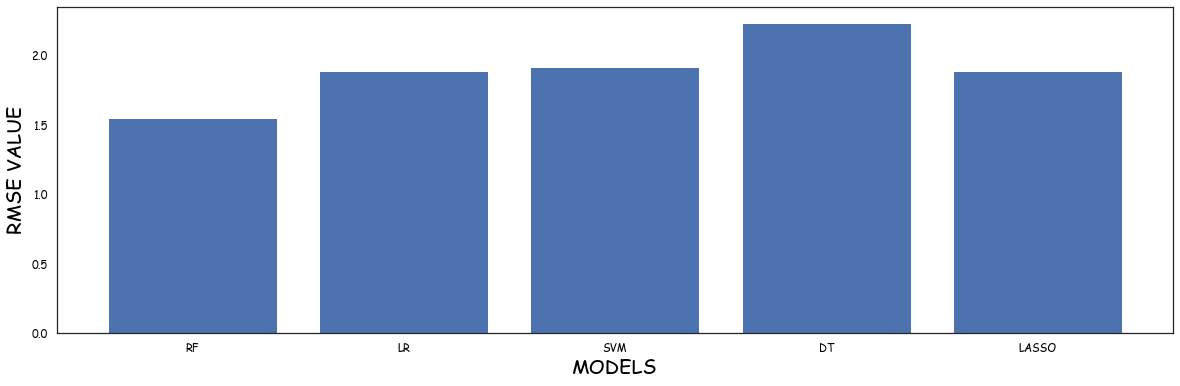

In [120]:
plt.figure(figsize=(20,6))
plt.bar(rmse_val.keys(),rmse_val.values())
plt.xlabel('MODELS')
plt.ylabel('RMSE VALUE')

Text(0, 0.5, 'MSE VALUE')

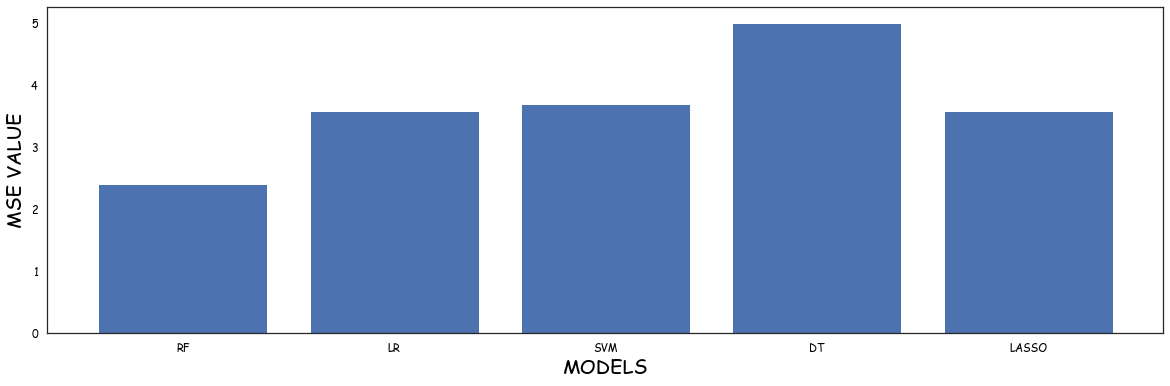

In [121]:
plt.figure(figsize=(20,6))
plt.bar(mse_val.keys(),mse_val.values())
plt.xlabel('MODELS')
plt.ylabel('MSE VALUE')

Text(0, 0.5, 'MAE VALUE')

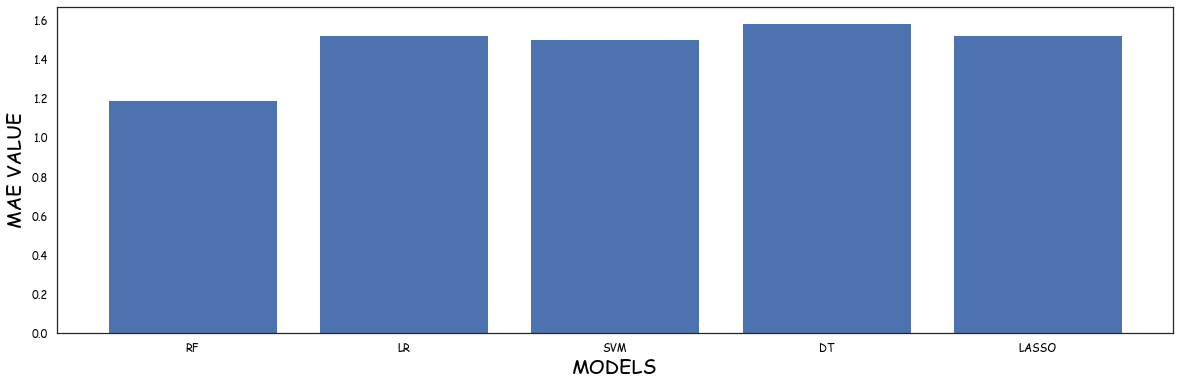

In [122]:
plt.figure(figsize=(20,6))
plt.bar(mae_val.keys(),mae_val.values())
plt.xlabel('MODELS')
plt.ylabel('MAE VALUE')

Text(0, 0.5, 'R2 VALUE')

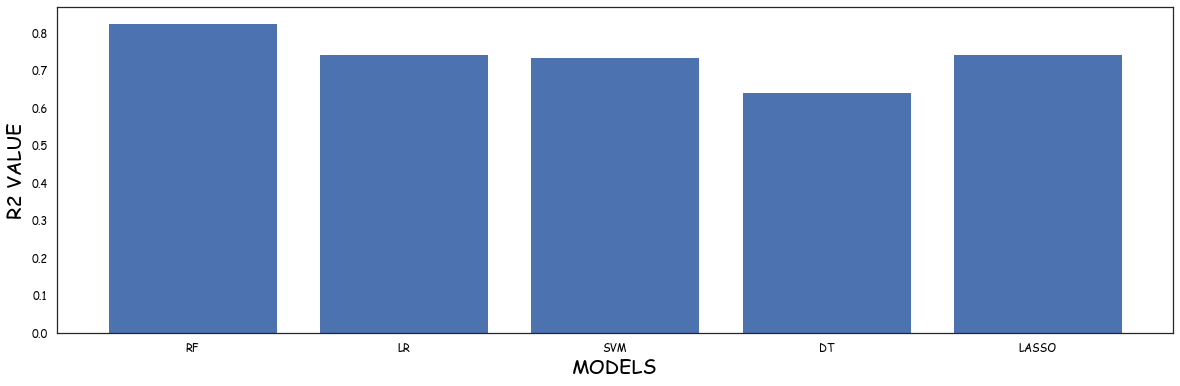

In [123]:
plt.figure(figsize=(20,6))
plt.bar(r2_val.keys(),r2_val.values())
plt.xlabel('MODELS')
plt.ylabel('R2 VALUE')